# Strategic Insights for Movie Production: Analyzing Trends and Success Factors in the Film Industry

#### Objective:


The primary goal of this project is to analyze current trends and performance metrics in the movie industry using data from movie websites such as IMDb and Box Office Mojo. By examining successful movie genres, optimal budget allocations, and best release times, we aim to provide actionable insights to guide the strategic decisions of our new movie studio, maximizing the potential for financial success and audience engagement.

#### Key Stakeholders:
  **1. Head of the New Movie Studio:** Primary decision-maker responsible for overseeing the studio's strategy, production slate, and budget allocations.

  **2.Data Analysts and Researchers:** tasked with providing insights and analysis to inform strategic decisions regarding genre selection, budget allocation, and release timing.

  **3.Investors and Financial Backers:** those who provide the capital necessary for producing movies and expect a return on their investment.

  **4.Chief Executive Office(CEO):** Provides overall vision and direction for the company's new venture into movie production. 

#### Key Questions:
1. What types of films are currently performing the best at the box office?
   - Identify the genres performing really well that could be invested in.
2. How do IMDb ratings/number of votes correlate with box office revenue?
   - Determing if high ratings really affect the revenue of a movie
3. When is the best time to release a movie to maximize box office success?
   - Identify the best season to release a movie.

#### Data Overview:
The data for this analysis was sourced from IMDb and Box Office Mojo. These platforms provide comprehensive information about movies, including their ratings, genres, runtime, and box office performance.

They both contain information such as:
**IMDb Dataset**

   * Movie Information:
      - movie_id: Unique identifier for each movie.
      - primary_title: The main title of the movie.
      - original_title: The original title of the movie.
      - start_year: The year the movie was released.
      - runtime_minutes: The runtime of the movie in minutes.
      - genres: The genres associated with the movie.
      
  * Ratings and Popularity:
      - averagerating: The average IMDb rating of the movie.
      - numvotes: The number of votes the movie has received on IMDb.

**Box Office Mojo Dataset**
  * Revenue Information:
       - title: The title of the movie as per Box Office Mojo.
       - studio: The studio that produced the movie.
       - domestic_gross: The domestic box office gross revenue.
       - foreign_gross: The foreign box office gross revenue.
       - year: The release year of the movie.
       - total_gross: The total box office gross revenue (domestic + foreign).



#### Analysis Goals:
**1. Identify Successful Movie Genres:** Determine which movie genres generate the highest box office revenues and receive the highest audience ratings.

**2.Analyze Relationship Between Ratings and Revenue:** Understand how IMDb ratings and the number of votes correlate with box office performance.

**3.Optimal Budget Allocation:** Analyze the relationship between production budgets and box office revenues to recommend optimal budget ranges for different genres.

**4.Determine Best Release Times:** Identify the most profitable times of the year to release movies based on historical box office data.

#### Expected Outcomes:
1.  A list of top-performing genres that should be prioritized for future production.
2. Insights into whether higher-rated movies tend to earn more revenue, helping to guide quality and marketing focus.
3. Determine on which season is the best to release specific genres.
4. Recommendations on budget allocations that maximize on return on investment.

# Data Understanding

## Data Collection

### Read the datasets
- To see which contents are in the datasets, assess them and see which data to use for the analysis.
- Since there are a number of datasets, let's start with the the box office mojo dataset.


In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


### Box office mojo dataset

In [2]:
#load the box office mojo dataset
bom = pd.read_csv('Data/bom.movie_gross.csv.gz')

#turn the dataset to a dataframe
bom_df = pd.DataFrame(bom)

#read the first 5 rows of the dataset
print(bom_df.head())

print(bom_df.shape)

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
(3387, 5)


In [3]:
import sqlite3

#connect to the database
con = sqlite3.connect('Data\im.db\im.db')

#load the tables from the database
imdb_movie_akas = pd.read_sql_query('SELECT * FROM movie_akas', con)
imdb_movie_basics = pd.read_sql_query('SELECT * FROM movie_basics ', con)
imdb_movie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings', con)



In [4]:
#change the tables to dataframes
movie_akas_df = pd.DataFrame(imdb_movie_akas)
movie_basics_df = pd.DataFrame(imdb_movie_basics)
movie_ratings_df = pd.DataFrame(imdb_movie_ratings)

### movie_akas_df cleaning

In [5]:
#check the first 5 rows of the tables
print(movie_akas_df.head())

    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg         None         None                0.0  
1     None  imdbDisplay         None                0.0  
2     None  imdbDisplay         None                0.0  
3     None         None  short title                0.0  
4     None  imdbDisplay         None                0.0  


In [6]:
#inspect the movie_akas table
print(movie_akas_df.isnull().sum().sort_values(ascending=False))
print(movie_akas_df.shape)

attributes           316778
language             289988
types                163256
region                53293
is_original_title        25
movie_id                  0
ordering                  0
title                     0
dtype: int64
(331703, 8)


- Since it has a number of columns with missing values, I drop columns:
1. attributes- because it has almost all values as null.
2. language- because it has more than half of null values. Almost all of them
3. Types- It has a large number of missing values and the column is not necessary in the analysis.
4. Region- it not necessary column

In [7]:
#drop columns with missing values
movie_akas_df = movie_akas_df.drop(['attributes', 'language', 'types','region','ordering','is_original_title'], axis=1)#axis=1 means drop columns


In [8]:
print(movie_akas_df.isnull().sum().sort_values(ascending=False))
print(movie_akas_df.shape)

movie_id    0
title       0
dtype: int64
(331703, 2)


- We go to the other tables, the movie_basics and movie_ratings table

### movie_basics_df cleaning

In [9]:
movie_basics_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
#check for missing values in the movie_basics table
print(movie_basics_df.isnull().sum().sort_values(ascending=False))
#check the shape of the table
print(movie_basics_df.shape)

runtime_minutes    31739
genres              5408
original_title        21
movie_id               0
primary_title          0
start_year             0
dtype: int64
(146144, 6)


- Fill the missing values of runtime minutes with the mean, missing values of genres with unknown and missing values of original title with it's primary title

In [11]:
#fill the missing values in the runtime minutes column with the mean of the column
movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].fillna(movie_basics_df['runtime_minutes'].mean())

#fill missing values in genres column with 'unknown'
movie_basics_df['genres'] = movie_basics_df['genres'].fillna('unknown')

#fill missing values in the original title column with primary title
movie_basics_df['original_title'] = movie_basics_df['original_title'].fillna(movie_basics_df['primary_title'])  



In [12]:
# check if there are missing values
print(movie_basics_df.isnull().sum().sort_values(ascending=False))


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


### movie_rankings_df cleaning

In [13]:
#check missing values in the movie_rankings_df
print(movie_ratings_df.isnull().sum().sort_values(ascending=False))
print(movie_ratings_df.shape)

movie_id         0
averagerating    0
numvotes         0
dtype: int64
(73856, 3)


- Since there are no missing values in the movie_rankings_df we can merge the three dataframes on movie_id

### Merging the tables

In [14]:
#merge the movie_basics and movie_ratings and movie_akas tables
movie_basics_ratings = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner')
#print the first 5 rows of the merged table
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119


In [15]:
#check for missing values in the merged table
print(movie_basics_ratings.isnull().sum().sort_values(ascending=False))
#check the shape of the merged table
print(movie_basics_ratings.shape)

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64
(73856, 8)


In [16]:
#merge the movie_basics_ratings and movie_akas tables
imdb_combined = pd.merge(movie_basics_ratings, movie_akas_df, on='movie_id', how='inner')   
imdb_combined.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sangharsh
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sungharsh
5,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season
6,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din
7,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Monsoon Day
8,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din
9,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,La otra cara del viento


In [17]:
#check the shape of the merged table
print(imdb_combined.shape)
#check for missing values in the merged table
print(imdb_combined.isnull().sum().sort_values(ascending=False))

(261806, 9)
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title              0
dtype: int64


In [18]:
#check for duplicates in the merged table
print(imdb_combined.duplicated().sum())

57795


In [19]:
#combine the bom and imdb_combined tables
combined_df = pd.merge(imdb_combined, bom_df, on = 'title', how = 'inner')
combined_df.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,Whiplash,SPC,13100000.0,35900000,2014
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
5,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
6,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
8,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
9,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015


In [20]:
#check the shape of the combined table
print(combined_df.shape)
#check for missing values in the combined table
print(combined_df.isnull().sum().sort_values(ascending=False))
#check for duplicates in the combined table
print(combined_df.duplicated().sum())

(10624, 13)
foreign_gross      3431
domestic_gross       63
studio                8
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
title                 0
year                  0
dtype: int64
7253


In [21]:
#drop the duplicates in the combined table
combined_df = combined_df.drop_duplicates()

In [22]:
#describe the foreign gross column
print(combined_df['foreign_gross'].value_counts())

foreign_gross
1200000      19
7700000      16
4200000      14
8000000      12
2400000      12
             ..
935000        1
23100000      1
45400000      1
126400000     1
82100000      1
Name: count, Length: 1044, dtype: int64


In [23]:
#describe the domestic gross column
print(combined_df['domestic_gross'].describe())


count    3.344000e+03
mean     3.093724e+07
std      6.907360e+07
min      1.000000e+02
25%      1.297500e+05
50%      2.000000e+06
75%      3.302500e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64


- Since the foreign_gross column is necessary and has missing values, we can fill the missing values with 0. This way we assume that the movie did not record any foreign gross. For the domestic gross column we fill missing values with the 0 as well and assume those movies didn't record domestic gross.



In [24]:
#fill the missing values in the foreign gross and domestic gross columns with 0
combined_df['foreign_gross'] = combined_df['foreign_gross'].fillna(0)

combined_df['domestic_gross'] = combined_df['domestic_gross'].fillna(0)

#check for missing values in the combined table
print(combined_df.isnull().sum().sort_values(ascending=False))


studio             3
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title              0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64


In [25]:
combined_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,0,2016
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,Whiplash,SPC,13100000.0,35900000,2014
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
6,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014


In [26]:
#create a new column total_gross by adding the foreign_gross and domestic_gross columns
#first of all remove the commas in the columns
combined_df['foreign_gross'] = combined_df['foreign_gross'].str.replace(',','')
#convert the column to numeric using pd.to_numeric
combined_df['foreign_gross'] = pd.to_numeric(combined_df['foreign_gross'])
combined_df['domestic_gross'] = pd.to_numeric(combined_df['domestic_gross'])


In [27]:
#check the first 5 rows of the combined table
combined_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,Whiplash,SPC,13100000.0,35900000.0,2014
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
6,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014


In [28]:
#replace NaN values in the foreign_gross and domestic_gross columns with 0
combined_df['foreign_gross'] = combined_df['foreign_gross'].fillna(0)
combined_df['domestic_gross'] = combined_df['domestic_gross'].fillna(0)

In [29]:
#create a new column total_gross by adding the foreign_gross and domestic_gross columns
combined_df['total_gross'] = combined_df['foreign_gross'] + combined_df['domestic_gross']   
#if foreign_gross or domestic_gross is missing, fill the total_gross with the value in the other column
combined_df['total_gross'] = combined_df['total_gross'].fillna(combined_df['foreign_gross'] + combined_df['domestic_gross'])


In [30]:
combined_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,Whiplash,SPC,13100000.0,35900000.0,2014,49000000.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
6,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0


In [31]:
combined_df.shape

(3371, 14)

- Upon cleaning the combined dataframe, the number of rows nears the number of rows in the box office mojo dataset as it has 3387 but on cleaning the combined dataframe has 3371 rows.

In [32]:
combined_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross', 'foreign_gross', 'year', 'total_gross'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

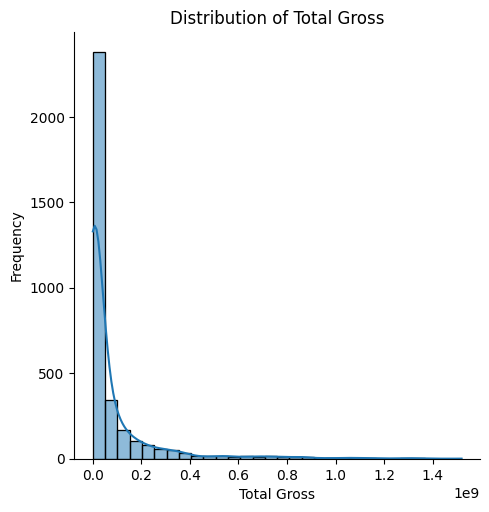

In [33]:
#plot the total_gross column
plt.figure(figsize=(12,8))
sns.displot(combined_df['total_gross'], kde=True, bins=30)
plt.title('Distribution of Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Frequency')
plt.show()

-  the distribution of the total_gross column is right skewed. Most of the movies have a total gross of less than 100 million dollars.

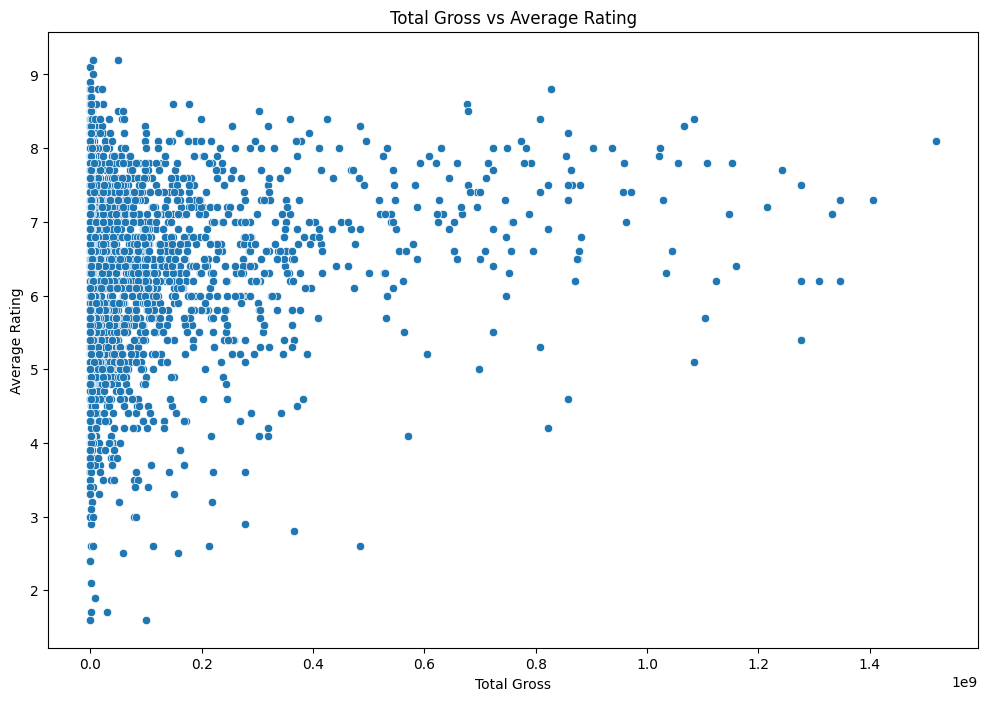

In [34]:
   #plot a scatter plot of the total_gross and the averagerating columns
plt.figure(figsize=(12,8))
sns.scatterplot(data=combined_df, x='total_gross', y='averagerating')
plt.title('Total Gross vs Average Rating')
plt.xlabel('Total Gross')
plt.ylabel('Average Rating')
plt.show()


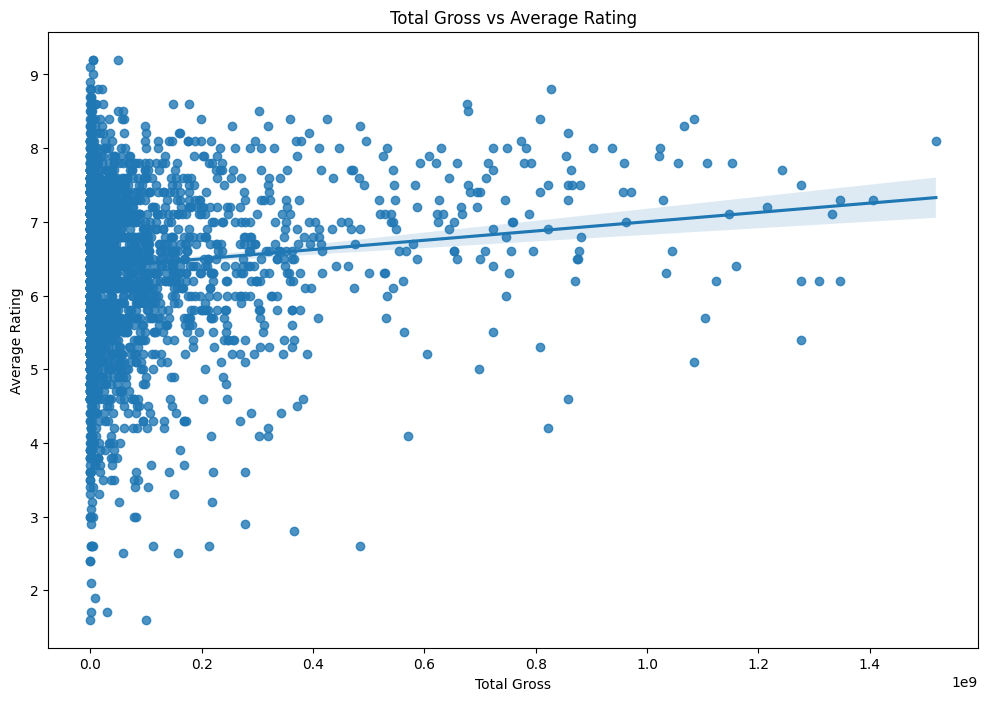

In [58]:
#create a linear regression plot of the total_gross and averagerating columns
plt.figure(figsize=(12,8))
sns.regplot(data=combined_df, x='total_gross', y='averagerating')
plt.title('Total Gross vs Average Rating')
plt.xlabel('Total Gross')
plt.ylabel('Average Rating')
plt.show()


- Since the relationship between total gross and averaging rating is non-linear let's try to linearize tot

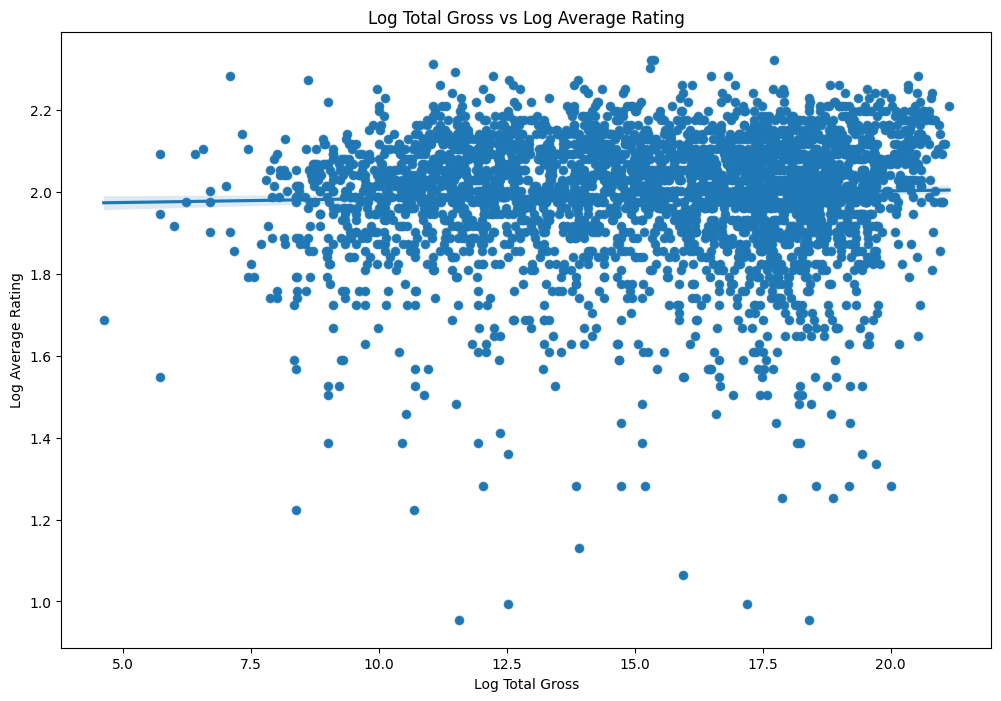

In [63]:
#since the total_gross vs averagerating plot shows a non-linear relationship let's try to linearize the relationship by taking the log of both columns
combined_df['log_total_gross'] = np.log1p(combined_df['total_gross'])
combined_df['log_averagerating'] = np.log1p(combined_df['averagerating'])

#plot the log_total_gross vs log_averagerating columns  
plt.figure(figsize=(12,8))
sns.scatterplot(data=combined_df, x='log_total_gross', y='log_averagerating')
sns.regplot(data=combined_df, x='log_total_gross', y='log_averagerating')
plt.title('Log Total Gross vs Log Average Rating')
plt.xlabel('Log Total Gross')   
plt.ylabel('Log Average Rating')
plt.show()




- The above plot indicates a positive but non-linear relationship between the total gross and the average rating of movies. This suggests that while movies with higher ratings tend to have higher total gross earnings, a high rating alone does not guarantee a high total gross. Other factors likely influence the total gross of a movie.
- Since the plot is not linear we cannot perform linear regression.

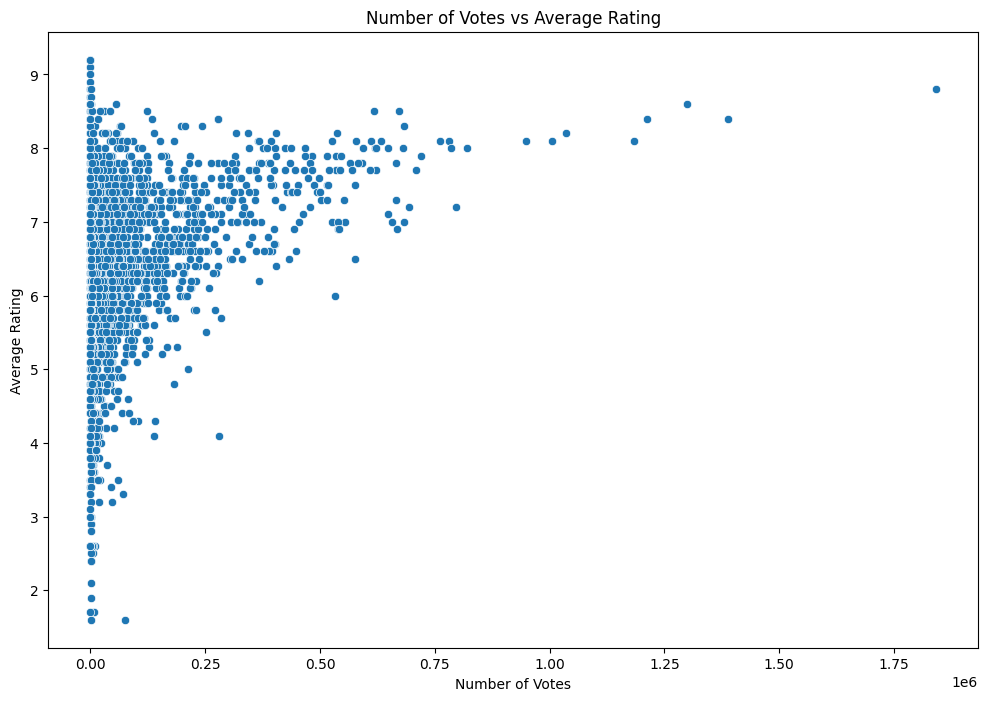

In [35]:
# plot a scatter plot of the number of votes and the averagerating columns
plt.figure(figsize=(12,8))
sns.scatterplot(data=combined_df, x='numvotes', y='averagerating')
plt.title('Number of Votes vs Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()


- The scatterplot shows a positive relationship between the number of votes and the average rating, indicating that movies with more votes tend to have higher average ratings. However, this relationship is not linear, suggesting that a high number of votes does not necessarily correspond to a proportionally high average rating. Other factors may influence the average rating beyond just the number of votes.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20816\2740520946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.head(30).values, y=genre_gross.head(30).index, palette='viridis')


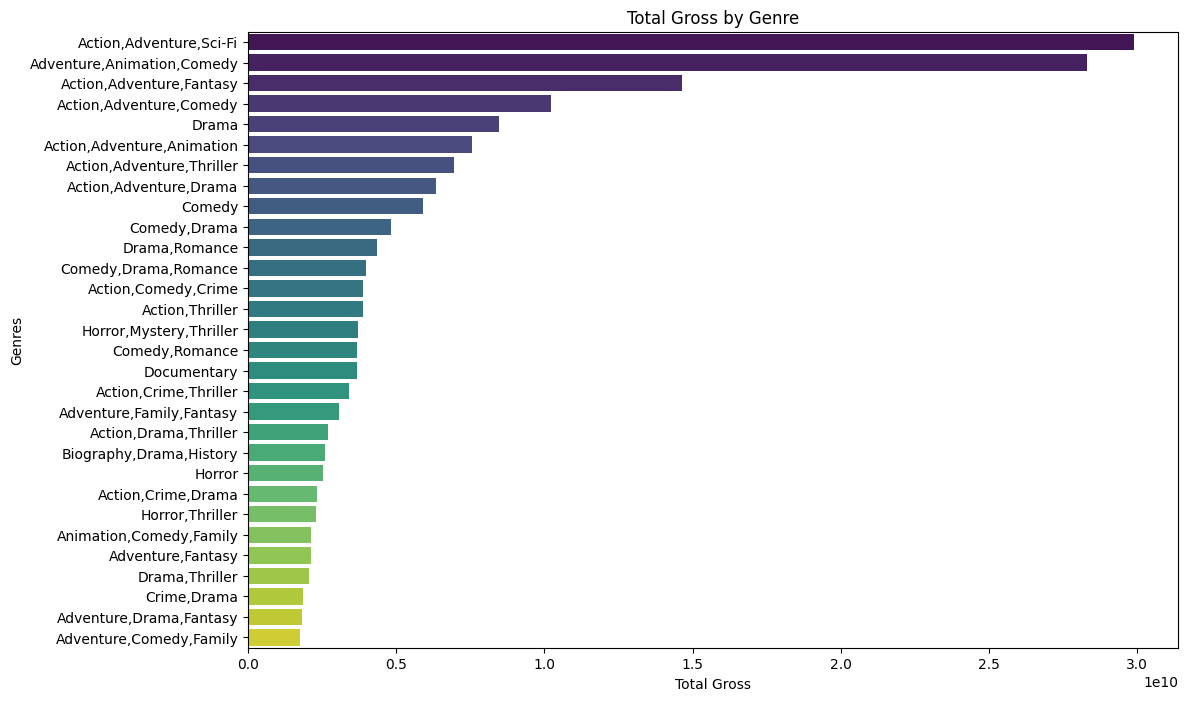

In [36]:
#plot a bar chart genres vs total_gross for the top 20 genres
genre_gross = combined_df.groupby('genres')['total_gross'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=genre_gross.head(30).values, y=genre_gross.head(30).index, palette='viridis')
plt.title('Total Gross by Genre')
plt.xlabel('Total Gross')
plt.ylabel('Genres')
plt.show()

- The plot above, we see that adventure has appeared a number of times more than the other genres in the top 30 genres meaning it accrues a lot of revenue.
- In addition action and drama have occurred same number of times in the top 30 genres. Meaning they are also top in accruing revenue.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20816\1320261969.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=genre_rating.head(30).values, y=genre_rating.head(30).index, palette='viridis')


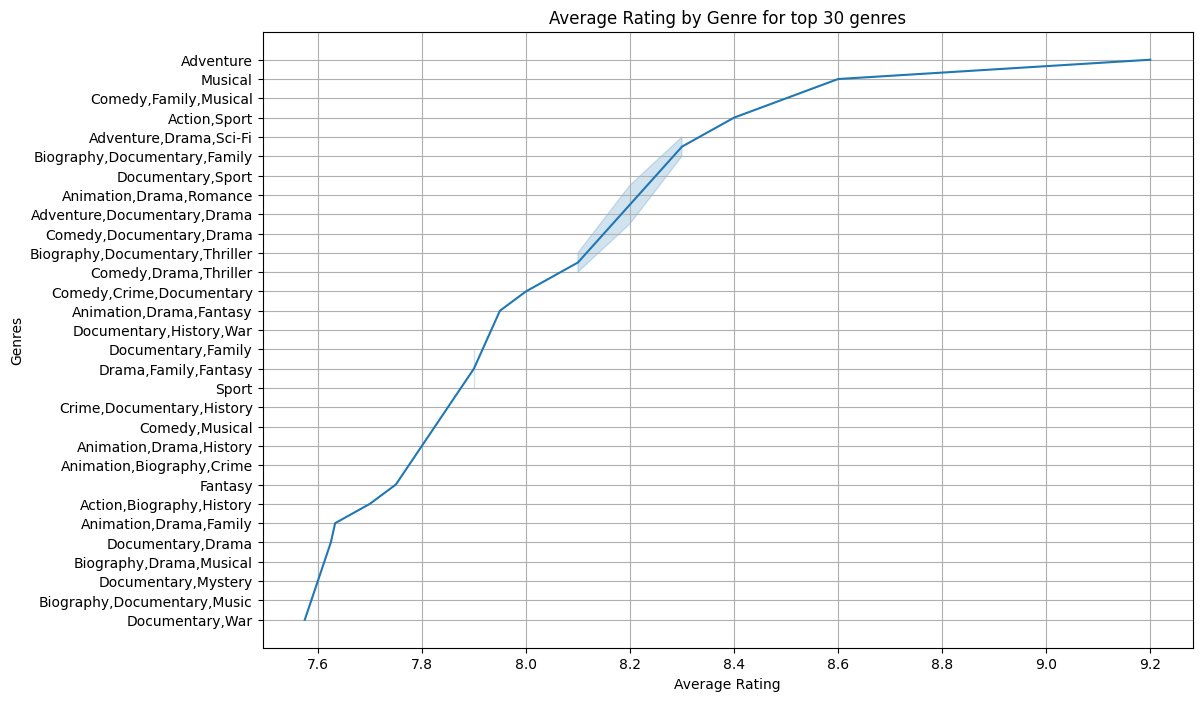

In [37]:
#plot lineplot of averagerating vs genres for the top 30 genres
genre_rating = combined_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.lineplot(x=genre_rating.head(30).values, y=genre_rating.head(30).index, palette='viridis') 
plt.title('Average Rating by Genre for top 30 genres')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.grid(True)
plt.show()

- Based on the above plot we see that adventure genre has the highest rating of 9.2 and documentaries of war have rating of 7.6

In [38]:
genre_most_votes = combined_df.groupby('genres')['numvotes'].sum().sort_values(ascending=False)
genre_most_votes.head(20)

genres
Action,Adventure,Sci-Fi       21507082
Action,Adventure,Fantasy       8844559
Adventure,Animation,Comedy     8517155
Action,Adventure,Comedy        6384869
Comedy,Drama,Romance           6231001
Drama                          5294157
Comedy,Drama                   4412072
Comedy                         4211761
Action,Comedy,Crime            4122504
Action,Crime,Drama             4102979
Action,Crime,Thriller          3987255
Drama,Romance                  3876144
Action,Adventure,Drama         3874417
Action,Adventure,Thriller      3712444
Action,Thriller                3638310
Biography,Drama,History        3326673
Comedy,Romance                 3272386
Drama,Thriller                 3059191
Action,Adventure,Animation     2751337
Horror,Mystery,Thriller        2746502
Name: numvotes, dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20816\2283310527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_most_votes.head(30).values, y=genre_most_votes.head(30).index, palette='viridis')


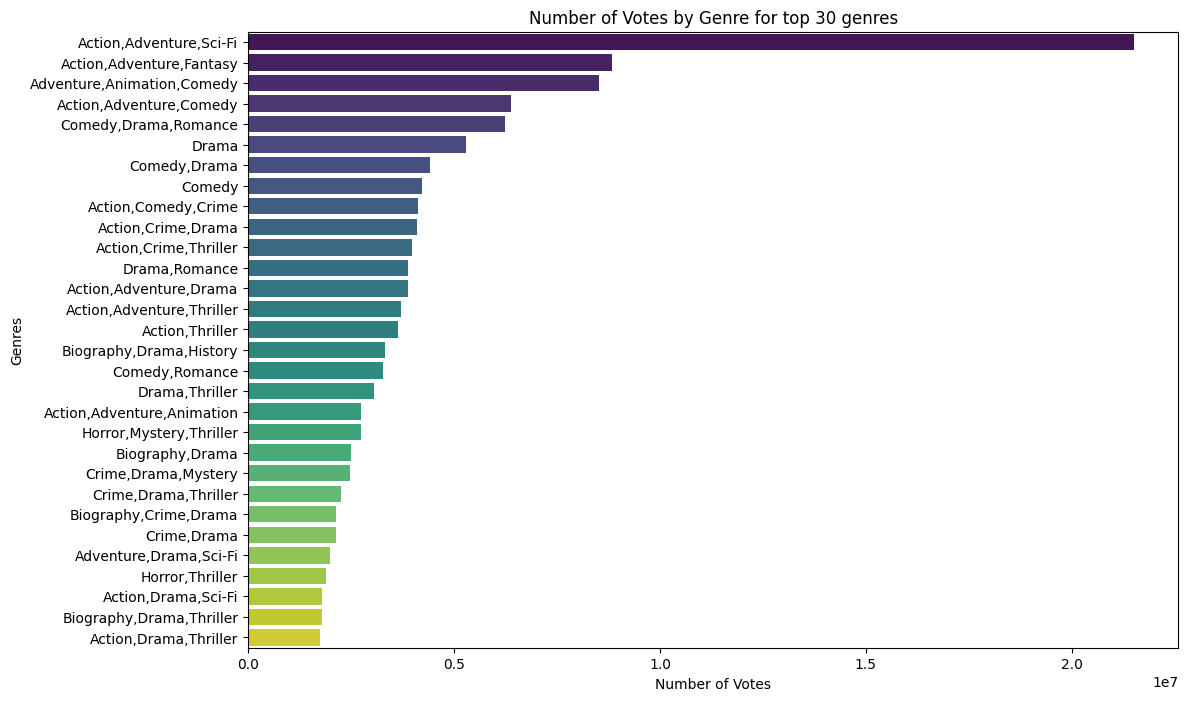

In [39]:
#plot number of votes vs genre for the top 30 genres

plt.figure(figsize=(12,8))
sns.barplot(x=genre_most_votes.head(30).values, y=genre_most_votes.head(30).index, palette='viridis')
plt.title('Number of Votes by Genre for top 30 genres')
plt.xlabel('Number of Votes')
plt.ylabel('Genres')
plt.show()


- In the bar graph above we also see that based on number of votes action, adventure and drama genres are really popular with the audience. As the have appeared a number of times more than the rest. 
- In this graph we also see that Comedy and Thriller are closely behind the already mentioned genres. Since we have different genres in different graphs we can do a weighted analaysis to know which genres have both highest number of ratings and highest number of votes and highest revenue.


- weighted average analysis involves multiplying the total_gross by the averagerating and numvotes then dividing by the total number of votes to get the weighted score


In [40]:
combined_df['weighted_rating'] = (combined_df['total_gross'] * combined_df['averagerating'] * combined_df['numvotes']) / combined_df['numvotes'].sum()  
combined_df['weighted_rating'] = combined_df['weighted_rating'].fillna(0)
filtered_data = combined_df[(combined_df['averagerating'] >= 7) & (combined_df['numvotes'] > 10000)]

top_genres = filtered_data.groupby('genres')['weighted_rating'].mean().sort_values(ascending=False).head(20)
print(top_genres)

genres
Adventure,Family,Fantasy      2.936368e+07
Adventure,Drama,Sci-Fi        2.781516e+07
Drama,Western                 2.189639e+07
Action,Thriller               2.147288e+07
Action,Adventure,Sci-Fi       2.063359e+07
Drama,Sci-Fi,Thriller         1.999977e+07
Adventure,Fantasy             1.854092e+07
Action,Adventure,Fantasy      1.502916e+07
Action,Adventure,Biography    1.339580e+07
Action,Adventure,Comedy       1.337391e+07
Action,Adventure,Thriller     1.307580e+07
Mystery,Thriller              1.215065e+07
Action,Adventure,Horror       1.058797e+07
Action,Adventure,Family       8.213779e+06
Action,Adventure,Crime        8.156191e+06
Action,Sci-Fi                 8.087983e+06
Adventure,Mystery,Sci-Fi      7.694909e+06
Crime,Mystery,Thriller        7.183719e+06
Adventure,Animation,Comedy    7.021326e+06
Horror,Thriller               6.551174e+06
Name: weighted_rating, dtype: float64


- By multiplying total_gross by average_rating and then by num_of_votes, you’re giving more importance to movies with higher ratings and more votes. 
- Dividing by the sum of num_of_votes normalizes this value to get an average weighted by the number of votes.

- The resulting values indicate the weighted average gross revenue for movies within each genre or genre combination. Higher values suggest that the genre combinations with higher average ratings and more votes tend to have higher total gross revenues.
- considering both their ratings and the number of votes they have received the top genre combinations with highest revenue are:
     1. Adventure, Family, Fantasy $29,363,680: This genre combination has the highest weighted gross, suggesting that movies in this genre with high ratings and many votes tend to have the highest total gross revenue.It's a solid choice for businesses looking to target a broad audience with popular and family-friendly content.
     2. Adventure, Drama, Sci-Fi: $27,815,160- blending adventure with drama and sci-fi appeals to a significant audience.
     3. Drama, Western: $21,896,390 - While more niche, this genre combination shows considerable success, potentially appealing to fans of classic and dramatic storytelling.
     4. Action, Thriller: $21,472- Action and thriller genres perform strongly, suggesting that high-intensity and suspenseful content is popular.
     5. Action, Adventure, Sci-Fi: $20,633,590-  Combining action with adventure and sci-fi is also highly successful, indicating a preference for high-energy and futuristic themes.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20816\3929439682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


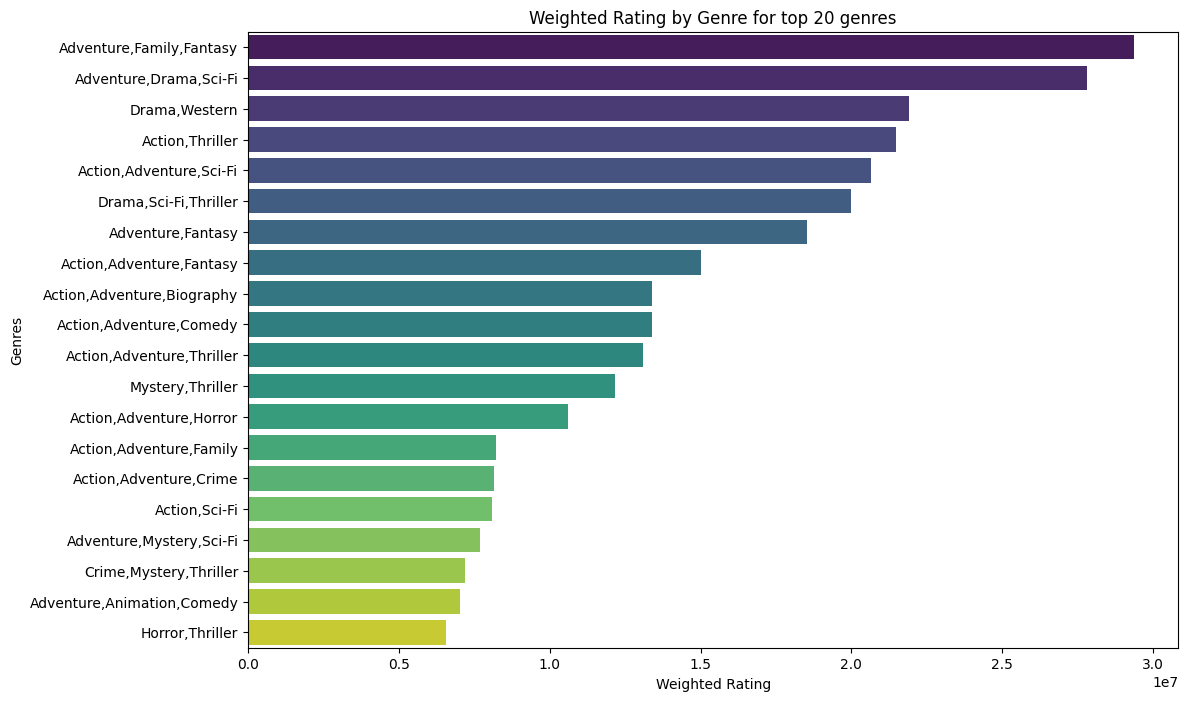

In [41]:
# plot the weighted rating vs genres for the top 20 genres
plt.figure(figsize=(12,8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Weighted Rating by Genre for top 20 genres')
plt.xlabel('Weighted Rating')
plt.ylabel('Genres')
plt.show()


In [42]:
#plot the runtime_minutes vs genres for the top 20 weighted rating genres
genre_runtime = filtered_data.groupby('genres')['runtime_minutes'].mean().sort_values(ascending=False).head(20)
genre_runtime

genres
Action,Drama,Mystery          172.000000
Adventure,Family,Fantasy      169.000000
Drama,Western                 165.000000
Action,Comedy,Drama           163.000000
Adventure,Drama,Romance       163.000000
Comedy,Drama,Musical          160.000000
Adventure,Drama,Sci-Fi        156.500000
Action,Adventure,Biography    156.000000
Action,Drama                  154.000000
Adventure,Fantasy             152.500000
Crime,Drama,History           143.000000
Crime,Drama,Mystery           142.833333
Crime,Thriller                139.000000
Action,Adventure,Thriller     138.250000
Mystery,Thriller              138.000000
Action,Adventure,Drama        137.000000
Action,Adventure,Sci-Fi       135.583333
Drama,Sci-Fi                  135.000000
Action,Adventure,Fantasy      133.857143
Biography,Drama,Sport         133.750000
Name: runtime_minutes, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20816\2528183887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_runtime.values, y=genre_runtime.index, palette='viridis')


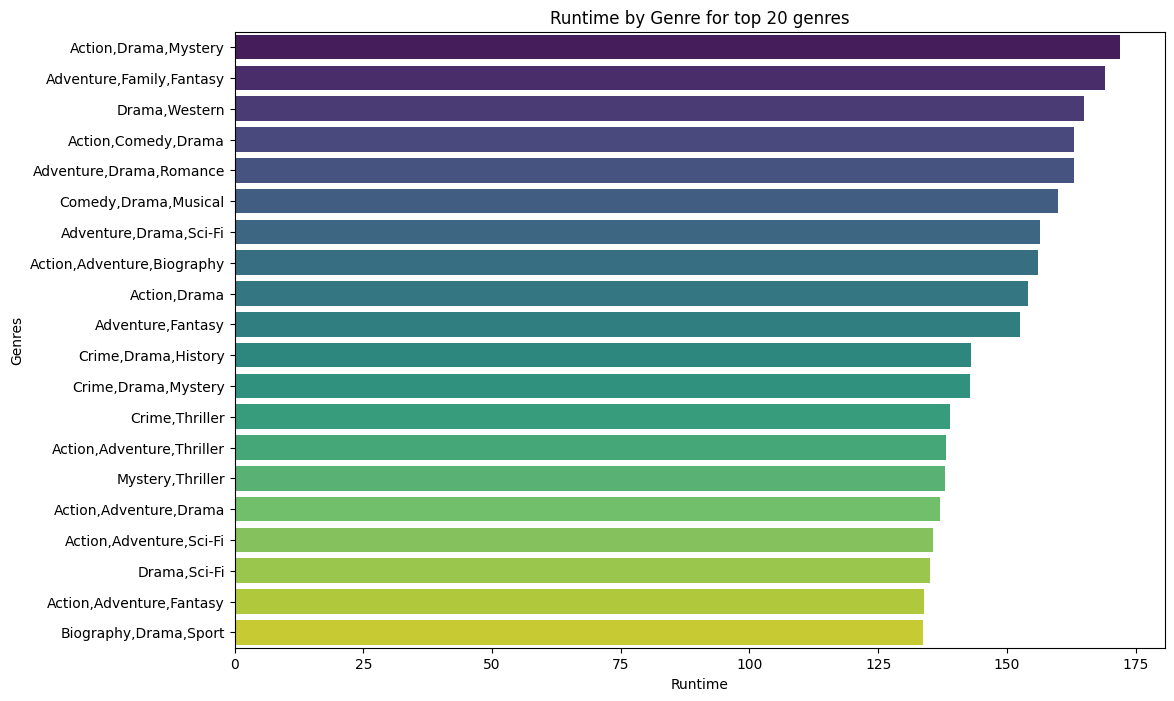

In [43]:
#plot the runtime_minutes vs genres for the top 20 weighted rating genres
plt.figure(figsize=(12,8))
sns.barplot(x=genre_runtime.values, y=genre_runtime.index, palette='viridis')
plt.title('Runtime by Genre for top 20 genres')
plt.xlabel('Runtime')
plt.ylabel('Genres')
plt.show()


- based on the above plot it is safe to say that the average runtime for a movie should be between 120 and 150 minutes

In [44]:
combined_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross,weighted_rating
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0,6.075155e+02
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0,1.022175e+04
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,Whiplash,SPC,13100000.0,35900000.0,2014,49000000.0,3.358969e+03
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0,1.912160e+06
6,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0,1.838655e+05


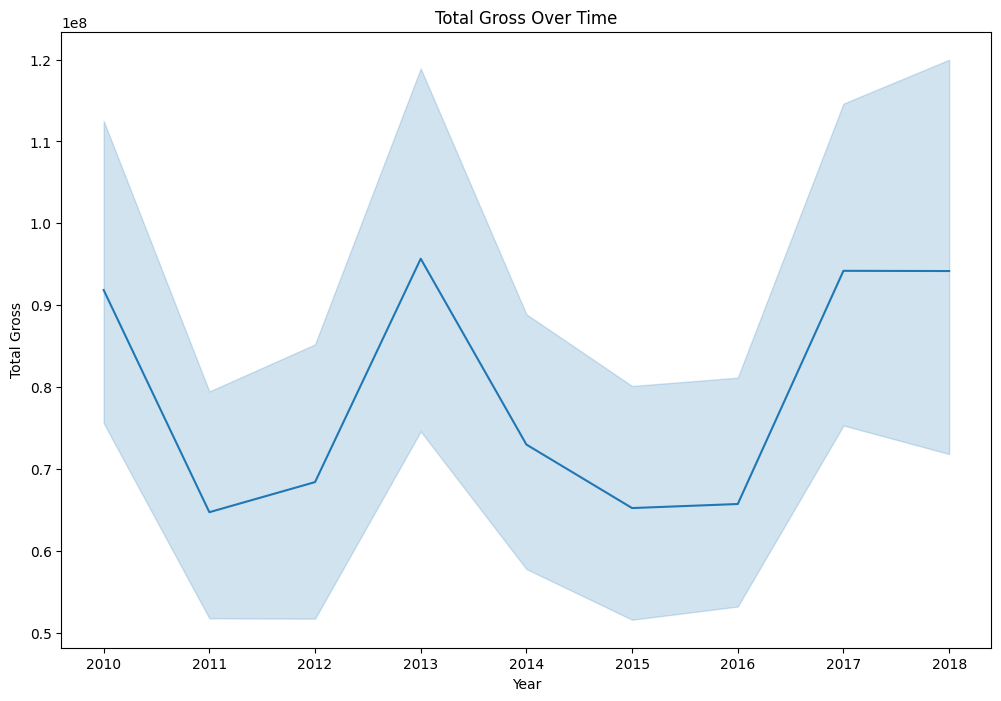

In [45]:
#plot the revenue distribution over time
plt.figure(figsize=(12,8))
sns.lineplot(x=combined_df['year'], y=combined_df['total_gross'])
plt.title('Total Gross Over Time')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.show()


-  the lineplot shows that the total gross has been increasing and decreasing over the years.It finally increased in 2017 and remained constant in 2018 and 2019.

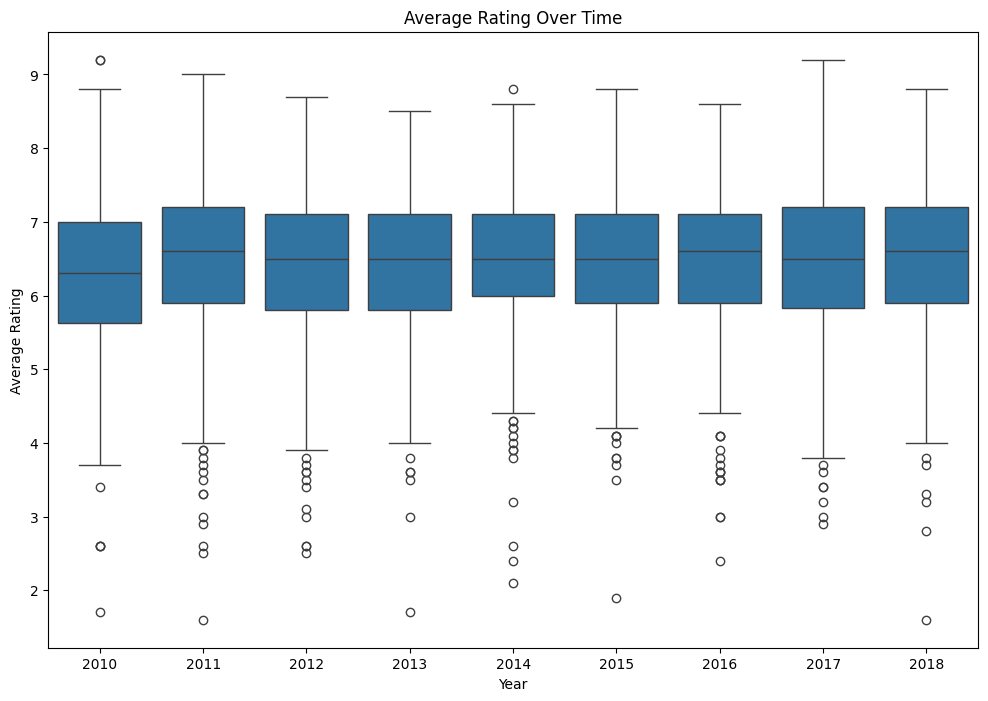

In [46]:
# plot a box plot of averagerating vs year
plt.figure(figsize=(12,8))
sns.boxplot(data=combined_df, x='year', y='averagerating')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


- the above means that over the years the average rating has been consistent.  The average rating being consistent means that the quality of movies has been consistent over the years. The rating being between 5.5 and 7.

In [47]:
# compare the different studios in terms of total gross
studio_gross = combined_df.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(20)
studio_gross

studio
BV         4.765225e+10
Uni.       3.431869e+10
Fox        3.256967e+10
WB         3.111400e+10
Par.       2.009688e+10
Sony       1.982222e+10
WB (NL)    1.261130e+10
LGF        9.595176e+09
LG/S       5.171424e+09
P/DW       5.076500e+09
Wein.      4.482576e+09
Focus      3.155568e+09
SGem       3.076108e+09
FoxS       2.997970e+09
WGUSA      2.863446e+09
Sum.       2.431971e+09
TriS       2.116915e+09
Rela.      1.973094e+09
STX        1.801200e+09
ORF        1.514131e+09
Name: total_gross, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20816\542253116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='viridis')


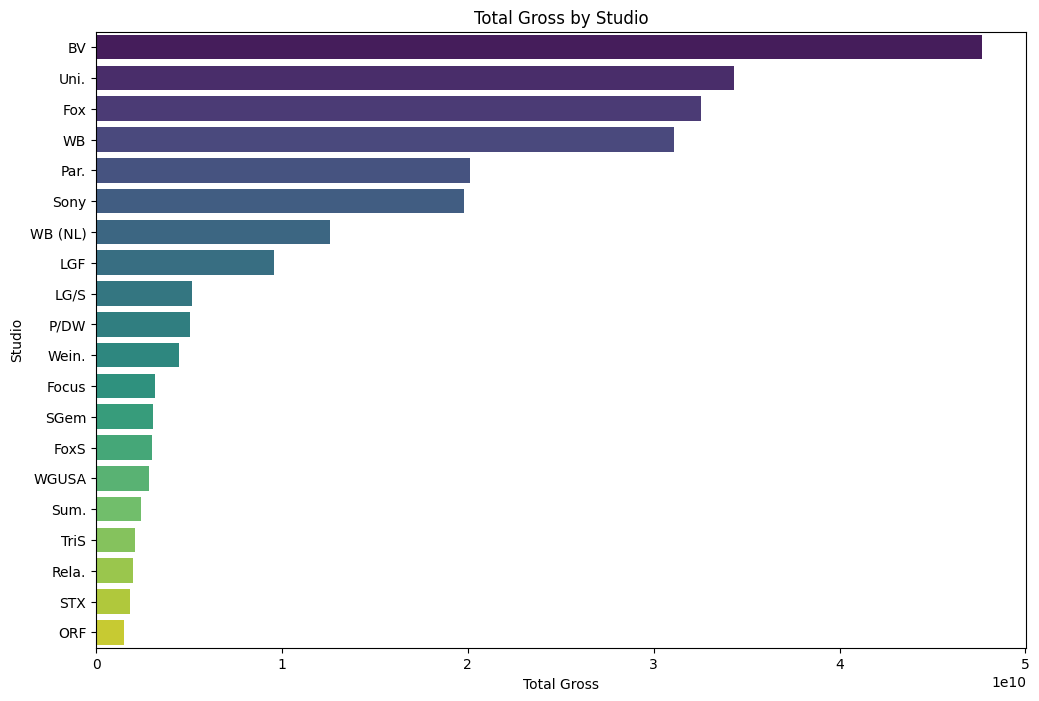

In [48]:
#Plot the total gross by Studio 
plt.figure(figsize=(12,8))
sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='viridis')
plt.title('Total Gross by Studio')
plt.xlabel('Total Gross')
plt.ylabel('Studio')
plt.show()

 - The studio with the highest total gross is BV.  Let's check the average rating of movies produced by BV, Universal Pictures, Fox and Warner Bros since they are the top 4 studios in terms of total gross with a total gross of over 10 billion dollars.

In [49]:
# compare the top 4 studios in terms of weighted rating
studio_rating = combined_df.groupby('studio')['weighted_rating'].mean().sort_values(ascending=False).head(20)
studio_rating

studio
BV          6.116729e+06
P/DW        4.548309e+06
WB          2.801009e+06
Par.        2.161394e+06
Fox         1.838279e+06
WB (NL)     1.795096e+06
Sony        1.367649e+06
Uni.        1.050397e+06
LG/S        7.863849e+05
GrtIndia    7.007039e+05
LGF         6.622136e+05
Wein.       5.891489e+05
TriS        5.009674e+05
Sum.        4.915603e+05
MGM         4.435305e+05
FoxS        3.309046e+05
SGem        3.308265e+05
FD          2.364150e+05
Rela.       1.917343e+05
FUN         1.781205e+05
Name: weighted_rating, dtype: float64

- In  The analysis of  weighted rating by studio above, we see that the top 4 studios are different from the top 4 studios in terms of total gross. This means that the top 4 studios in terms of total gross are not necessarily the ones with the highest weighted rating.
- Thus we can conclude that the top 4 studios to invest in are BV, P/DW, WB and Par. This is because they have the highest weighted rating which is a combination of total gross, average rating and number of votes.

###  Chi square test- to determine if there is a relationship genres and box office success
- Null Hypothesis: There is no relationship between genres and box office success
- Alternative Hypothesis: There is a relationship between genres and box office success

In [50]:
#perform a chi square test to determine if there is a relationship genres and box office success
#  Meaning if the genres of a movie has an effect on the box office success.
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(combined_df['genres'], combined_df['total_gross'])
contingency_table

total_gross,1.000000e+02,3.000000e+02,4.000000e+02,5.000000e+02,6.000000e+02,7.000000e+02,8.000000e+02,1.100000e+03,1.200000e+03,1.300000e+03,...,1.153300e+09,1.159400e+09,1.214800e+09,1.242800e+09,1.276400e+09,1.309500e+09,1.332600e+09,1.347000e+09,1.405400e+09,1.518900e+09
genres,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Animation",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"Action,Adventure,Biography",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Comedy",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sport,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#perform the chi square test
chi2,p, dof , expected = chi2_contingency(contingency_table)
print('chi2:', chi2)
print('p:', p)
print('dof:', dof)
print('expected:', expected) # expected values are the values of the contingency table that would be expected if there was no relationship between the two variables


chi2: 702536.7399013398
p: 4.372171456960414e-39
dof: 687154
expected: [[0.00593296 0.01779887 0.00593296 ... 0.01186592 0.00593296 0.00593296]
 [0.00177989 0.00533966 0.00177989 ... 0.00355977 0.00177989 0.00177989]
 [0.0074162  0.02224859 0.0074162  ... 0.01483239 0.0074162  0.0074162 ]
 ...
 [0.00889944 0.02669831 0.00889944 ... 0.01779887 0.00889944 0.00889944]
 [0.00029665 0.00088994 0.00029665 ... 0.0005933  0.00029665 0.00029665]
 [0.00207654 0.00622961 0.00207654 ... 0.00415307 0.00207654 0.00207654]]


- The p value is less than 0.05,we reject the null hypothesis meaning there is a relationship between genres and box office success.
- The chi2 value is 702536.74 and the degrees of freedom are 687154, meaning the genres and box office success are dependent on each other.
- If the chi2 was 0, it would mean that the genres and box office success are independent of each other. 
- The expected value is the value that would be expected if the genres and box office success were independent of each other.
* Thus, different genres have an effect on the box office success of a movie

### Linear Regression - to predict revenue of a movie

1. Plot a scatterplot to test for linearity between number of votes and total gross

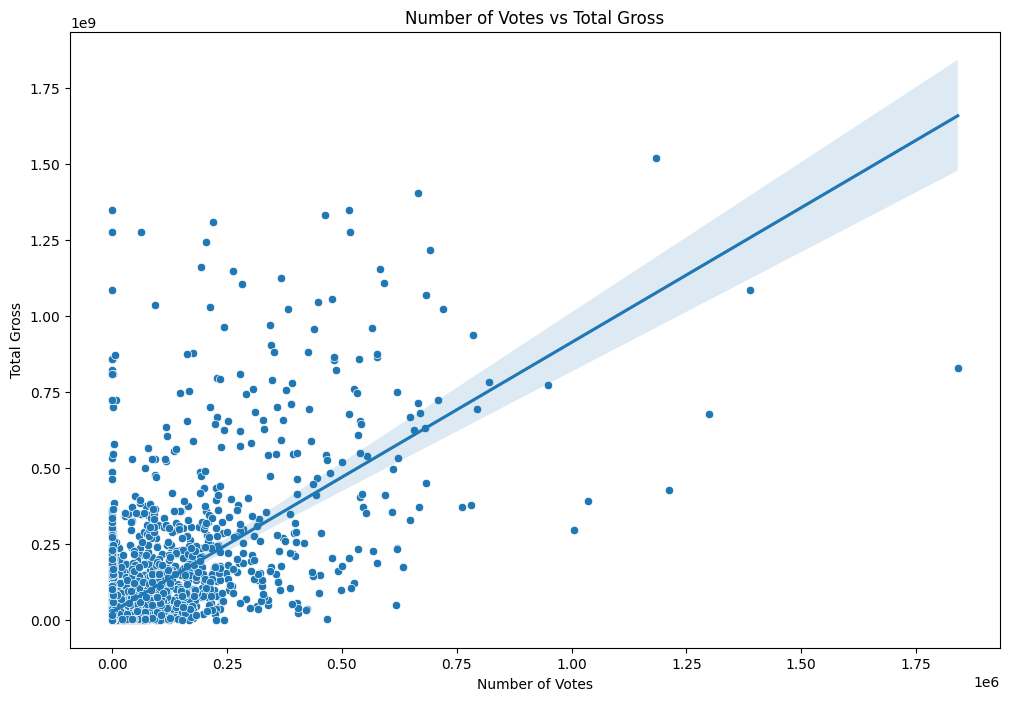

In [52]:
#first, plot a scatterplot to see the relationship between number of votes and total gross
plt.figure(figsize=(12,8))
sns.scatterplot(x=combined_df['numvotes'], y=combined_df['total_gross'])
#plot a regression line
sns.regplot(x=combined_df['numvotes'], y=combined_df['total_gross'], scatter=False)
plt.title('Number of Votes vs Total Gross')
plt.xlabel('Number of Votes')
plt.ylabel('Total Gross')
plt.show()




- The above plot shows a positive relationship between number of votes and total gross. Meaning as the number of votes increases, the total gross also increases.

2. Test for independence between the two variables; the independent variable- number of votes, dependent variable - total gross.

In [53]:
#test for correlation between number of votes and total gross
from scipy.stats import pearsonr

#calculate the correlation coefficient
corr = pearsonr(combined_df['numvotes'], combined_df['total_gross'])
print('Correlation coefficient:', corr[0]) 


Correlation coefficient: 0.6316715932903382


- the correlation is 0.632 which is a strong positive correlation. This means that as the number of votes increases, the total gross also increases.
- thus the two are dependent on each other and thus we can use linear regression to predict the total gross based on the number of votes

- Since the variables have passed to checks for linear regression we can go ahead and perform linear regression.

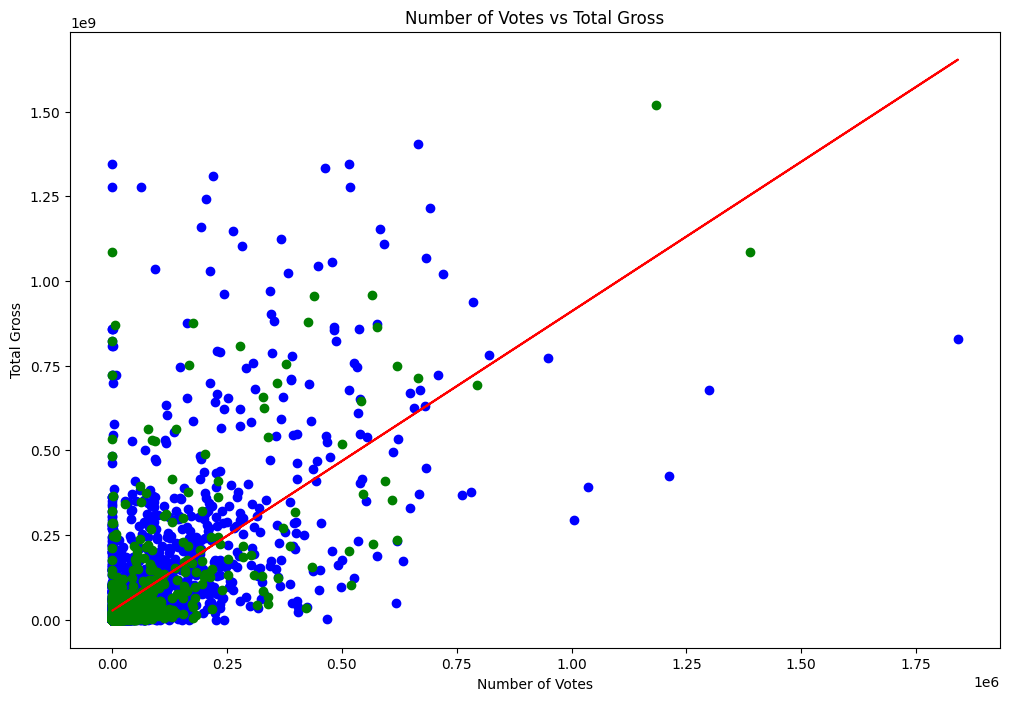

Mean Absolute Error: 68481660.23327129
Mean Squared Error: 1.5925441289339536e+16
Root Mean Squared Error: 126196043.08115028
R2 Score: 0.45498002659945247


In [57]:
#perform linear regression to predict total gross of a movie based on the number of votes
#import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#reshape the x variable to a 2d array
X = combined_df['numvotes']
x = np.array(X).reshape(-1,1)
y= combined_df['total_gross']

#split the data into training and testing sets
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)# 80% training and 20% testing

#create a linear regression object
linear_regressor = LinearRegression()

#fit the model
linear_regressor.fit(x_train,y_train)

#get the slope and intercept of the line
slope, intercept = linear_regressor.coef_, linear_regressor.intercept_  

#get the predicted values
y_pred = linear_regressor.predict(x_test)

#plot the regression line
plt.figure(figsize=(12,8))
# Plotting the scatter plot for the training and testing data
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Testing data')

# Plotting the regression line
plt.plot(x, linear_regressor.predict(x), color='red', label='Regression line')  # Regression line over the entire dataset

plt.title('Number of Votes vs Total Gross')
plt.xlabel('Number of Votes')
plt.ylabel('Total Gross')
plt.show()


#evaluate the performance of the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))




-  Mean Absolute Error (MAE)-  68,481,660.23
  - This means that on average, the model's predictions are off by about 68,481,660 units. MAE is useful for understanding the average magnitude of the errors without considering their direction (positive or negative).

- Mean Squared Error (MSE)-  1.5925441289339536e+16
  -  The MSE value indicates the average of the squared errors. Squaring the errors gives more weight to larger errors, which can be useful when you want to penalize large errors more. However, the very large value of 1.59e+16 suggests that the model's predictions have significant deviations from the actual values.

- Root Mean Squared Error (RMSE)- 126,196,043.08
  -  RMSE is the square root of MSE and provides a measure of the average error magnitude in the same units as the target variable. An RMSE of 126,196,043.08 indicates substantial average prediction errors, suggesting the model might not be fitting the data very well.

- R-squared (R²) Score- 0.45498002659945247
  - R², also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² value of 0.455 implies that approximately 45.5% of the variance in the target variable (sales) is explained by the model. This means the model has a moderate fit to the data but leaves about 54.5% of the variance unexplained.

- Overall Interpretation
   - The high values of MAE and RMSE indicate that the model's predictions are not very accurate and have significant errors.
    The R² score of 0.455 suggests that the model has some predictive power but is far from perfect. It explains less than half of the variability in the target variable.

# Recommendations

- Hence the above analysis help develop the following recommendations:
1. Prioritize investing in genres with the highest weighted gross revenues, such as:

    - Adventure, Family, Fantasy
   -  Adventure, Drama, Sci-Fi
    - Drama, Western

  - Other genres like Action as well seem to be performing pretty well. Thus, genres to consider are: Action, Adventure, Drama, Fantasy, Sci-Fi as they have appeared more than the rest at the top.

- These genres have demonstrated significant financial success, indicating strong audience interest and potential for high returns on investment. Producing movies in these genres can capitalize on existing audience preferences and trends.
- Produce movies with runtime of between 100 to 175 minutes.
- The top 4 studios to invest in are BV, P/DW, WB and Par. This is because they have the highest weighted rating which is a combination of total gross, average rating and number of votes.

2. Revenue: Based on the revenue prediction model, there is an observed positive relationship between the number of votes a movie receives and its total gross. However, given the performance metrics of the model, which include a high Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and a moderate R-squared (R²) score, the model's predictions may not be highly accurate. This means that while increasing the number of votes is likely to influence revenue, it's important to recognize that the model's performance indicates other factors may also play a significant role. Invest in targeted marketing campaigns to boost visibility and encourage more votes, but be mindful that this alone may not guarantee higher revenue.
- Allocate budget not only to marketing but also to enhancing movie quality, hiring a well-known cast, and optimizing distribution strategies. A comprehensive approach that combines these elements is likely to yield better results.

3. Strategically Plan Release Dates and Marketing Campaigns- Plan major film releases during peak movie-going periods such as summer and holiday seasons when audience attendance is typically higher.
For example release blockbuster Adventure or Sci-Fi films during the summer to capitalize on increased audience turnout, while family-friendly films can be released during holidays for maximum impact. 